# 투자자로써 음원 사업에 투자 하려 할때
# 피해야 할 상품은 무엇인가?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.


In [3]:
file_path = '../data/musicData2.csv'

musicData = pd.read_csv(file_path,encoding='UTF-8')

In [5]:
musicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          2178 non-null   int64  
 1   Month         2178 non-null   int64  
 2   Album Title   2178 non-null   object 
 3   Artist Name   2178 non-null   object 
 4   Genre         2177 non-null   object 
 5   Date          2178 non-null   object 
 6   Distribution  2178 non-null   object 
 7   Rating        2178 non-null   float64
 8   Music Count   2178 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 153.3+ KB


insight => Year이나 Month가 수치형 데이터로 되어 있다

In [6]:
musicData.shape

(2178, 9)

- insight => 데이터 행렬 갯수 파악

In [7]:
musicData.head(10)

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2
1,2017,1,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12
2,2017,1,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
3,2017,1,If You,에일리,발라드,2016.08.23,로엔 엔터테인먼트,6.9,1
4,2017,1,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1
5,2017,1,푸른 바다의 전설 OST Part 1,린,드라마음악,2016.11.17,로엔 엔터테인먼트,8.1,2
6,2017,1,신현희와김루트,신현희와김루트,"포크, 인디뮤직",2015.02.26,Mirrorball Music,8.1,6
7,2017,1,도깨비 OST Part 11,Various Artists,드라마음악,2017.01.09,(주)지니뮤직,8.8,3
8,2017,1,From. 우주소녀,우주소녀,댄스,2017.01.04,로엔 엔터테인먼트,8.2,6
9,2017,1,응답하라 1988 OST Part 2,이적,드라마음악,2015.11.07,(주)지니뮤직,8.6,1


- insight => 상단에 특이 사항 없음

In [8]:
musicData.tail(10)

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
2168,2018,10,Present : YOU,GOT7 (갓세븐),"댄스, 발라드, 알앤비/어반, 랩/힙합, 락",2018.09.17,(주)아이리버,8.3,16
2169,2018,10,Present : YOU,GOT7 (갓세븐),"댄스, 발라드, 알앤비/어반, 랩/힙합, 락",2018.09.17,(주)아이리버,8.3,16
2170,2018,10,LOVE YOURSELF 結 ‘Answer’,방탄소년단,랩/힙합,2018.08.24,(주)아이리버,8.4,26
2171,2018,10,Present : YOU,GOT7 (갓세븐),"댄스, 발라드, 알앤비/어반, 랩/힙합, 락",2018.09.17,(주)아이리버,8.3,16
2172,2018,10,Present : YOU,GOT7 (갓세븐),"댄스, 발라드, 알앤비/어반, 랩/힙합, 락",2018.09.17,(주)아이리버,8.3,16
2173,2018,10,RECIPE,벤,발라드,2018.05.08,(주)지니뮤직,7.1,10
2174,2018,10,Eyes On You,GOT7 (갓세븐),"댄스, 알앤비/어반",2018.03.12,(주)아이리버,8.6,7
2175,2018,10,Take,숀(SHAUN),"일렉트로니카, 인디뮤직",2018.06.27,워너뮤직코리아,3.7,4
2176,2018,10,우리 그만하자,로이킴,발라드,2018.09.18,(주)지니뮤직,7.0,2
2177,2018,10,하루도 그대를 사랑하지 않은 적이 없었다,임창정,"발라드, 댄스",2018.09.19,(주)인터파크,8.5,14


- insight => 하단에 특이 사항 없음

In [9]:
musicData.isnull().sum()

Year            0
Month           0
Album Title     0
Artist Name     0
Genre           1
Date            0
Distribution    0
Rating          0
Music Count     0
dtype: int64

insight => Genre 열에 결측치 1개 확인

In [10]:
musicData[musicData.Genre.isnull()]

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
1104,2017,12,All I Want For Christmas (EP),Mariah Carey,NaN,2007.11.26,Sony Music,8.9,3


In [11]:
musicData.Genre.value_counts()

댄스                              548
발라드                             409
랩/힙합                            300
알앤비/어반                          172
드라마음악                           141
포크                               96
팝                                91
발라드,  댄스                         89
댄스,  발라드                         56
발라드,  알앤비/어반                     47
댄스,  알앤비/어반                      38
댄스,  발라드,  알앤비/어반,  랩/힙합,  락     24
락                                21
발라드,  락,  포크                     18
팝,  얼터너티브 락                      13
댄스,  알앤비/어반,  일렉트로니카             13
일렉트로니카,  댄스,  알앤비/어반             13
발라드,  알앤비/어반,  포크                12
일렉트로니카                            9
포크,  인디뮤직                         9
발라드,  댄스,  알앤비/어반                 8
인디뮤직,  포크                         7
알앤비/어반,  발라드,  댄스                 6
드라마음악,  드라마음악                     5
발라드,  재즈                          4
인디뮤직,  랩/힙합                       4
일렉트로니카,  인디뮤직                     4
댄스,  일렉트로니카                 

In [12]:
musicData.loc[1104,'Genre'] = '팝,  캐롤'
musicData.loc[1104,'Genre']

'팝,  캐롤'

- insight => 정확히 일치하는 장르로 결측치 해결

In [13]:
musicData.Genre.value_counts()

댄스                              548
발라드                             409
랩/힙합                            300
알앤비/어반                          172
드라마음악                           141
포크                               96
팝                                91
발라드,  댄스                         89
댄스,  발라드                         56
발라드,  알앤비/어반                     47
댄스,  알앤비/어반                      38
댄스,  발라드,  알앤비/어반,  랩/힙합,  락     24
락                                21
발라드,  락,  포크                     18
팝,  얼터너티브 락                      13
댄스,  알앤비/어반,  일렉트로니카             13
일렉트로니카,  댄스,  알앤비/어반             13
발라드,  알앤비/어반,  포크                12
일렉트로니카                            9
포크,  인디뮤직                         9
발라드,  댄스,  알앤비/어반                 8
인디뮤직,  포크                         7
알앤비/어반,  발라드,  댄스                 6
드라마음악,  드라마음악                     5
발라드,  재즈                          4
인디뮤직,  랩/힙합                       4
일렉트로니카,  인디뮤직                     4
댄스,  일렉트로니카                 

In [14]:
musicData.isnull().sum()

Year            0
Month           0
Album Title     0
Artist Name     0
Genre           0
Date            0
Distribution    0
Rating          0
Music Count     0
dtype: int64

# 1차 분석

- 2017 ~ 2018년 까지 가장 사랑 받은 가수와 장르는 누구일까?
- 가장 사랑 받지 못한 가수와 장르는 무엇인가?

In [15]:
musicData['Distribution'].value_counts()

(주)지니뮤직             768
(주)아이리버             453
로엔엔터테인먼트            353
로엔 엔터테인먼트           229
(주)엔에이치엔벅스           78
워너뮤직코리아              61
YG PLUS              46
유니버설뮤직               45
소니뮤직                 39
(주)인터파크              16
지니뮤직                 16
(주)뮤직앤뉴              13
Universal            11
Mirrorball Music      8
퍼플파인 엔터테인먼트           7
퍼플파인엔터테인먼트            7
Sony Music            6
다날 엔터테인먼트             6
(주)미러볼뮤직              6
(주)루미넌트엔터테인먼트         4
Warner(Korea)         2
㈜인터파크                 2
(주)벅스                 1
포크라노스                 1
Name: Distribution, dtype: int64

In [16]:
musicData.loc[musicData['Distribution']=='퍼플파인 엔터테인먼트','Distribution'] = musicData.loc[musicData['Distribution']=='퍼플파인 엔터테인먼트',:].replace('퍼플파인 엔터테인먼트','퍼플파인엔터테인먼트')
musicData.loc[musicData['Distribution']=='로엔 엔터테인먼트','Distribution'] = musicData.loc[musicData['Distribution']=='로엔 엔터테인먼트',:].replace('로엔 엔터테인먼트','로엔엔터테인먼트')
musicData.loc[musicData['Distribution']=='Sony Music','Distribution'] = musicData.loc[musicData['Distribution']=='Sony Music',:].replace('Sony Music','소니뮤직')
musicData.loc[musicData['Distribution']=='Universal','Distribution'] = musicData.loc[musicData['Distribution']=='Universal',:].replace('Universal','유니버설뮤직')
musicData.loc[musicData['Distribution']=='㈜인터파크','Distribution'] = musicData.loc[musicData['Distribution']=='㈜인터파크',:].replace('㈜인터파크','(주)인터파크')
musicData.loc[musicData['Distribution']=='Mirrorball Music','Distribution'] = musicData.loc[musicData['Distribution']=='Mirrorball Music',:].replace('Mirrorball Music','(주)미러볼뮤직')
musicData.loc[musicData['Distribution']=='Warner(Korea)','Distribution'] = musicData.loc[musicData['Distribution']=='Warner(Korea)',:].replace('Warner(Korea)','워너뮤직코리아')
musicData.loc[musicData['Distribution']=='지니뮤직','Distribution'] = musicData.loc[musicData['Distribution']=='지니뮤직',:].replace('지니뮤직','(주)지니뮤직')

In [17]:
musicData['Distribution'].value_counts()

(주)지니뮤직          784
로엔엔터테인먼트         582
(주)아이리버          453
(주)엔에이치엔벅스        78
워너뮤직코리아           63
유니버설뮤직            56
YG PLUS           46
소니뮤직              45
(주)인터파크           18
(주)미러볼뮤직          14
퍼플파인엔터테인먼트        14
(주)뮤직앤뉴           13
다날 엔터테인먼트          6
(주)루미넌트엔터테인먼트      4
(주)벅스              1
포크라노스              1
Name: Distribution, dtype: int64

In [18]:
musicData_2017 = musicData.loc[musicData['Year']==2017,:].copy()
musicData_2018 = musicData.loc[musicData['Year']==2018,:].copy().reset_index()

In [19]:
musicData_2017.head()

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔엔터테인먼트,8.6,2
1,2017,1,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12
2,2017,1,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
3,2017,1,If You,에일리,발라드,2016.08.23,로엔엔터테인먼트,6.9,1
4,2017,1,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1


In [20]:
musicData_2018.head()

,index,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,1186,2018,1,Red Pill Blues (Deluxe Edition),Maroon 5,"팝, 얼터너티브 락",2017.11.03,유니버설뮤직,6.9,21
1,1187,2018,1,Be Ordinary,황치열,발라드,2017.06.13,(주)엔에이치엔벅스,8.5,7
2,1188,2018,1,"Universe - 겨울 스페셜 앨범, 2017",EXO,발라드,2017.12.26,(주)아이리버,8.6,8
3,1189,2018,1,5집 ANOTHER LIGHT,젝스키스,발라드,2017.09.21,(주)지니뮤직,8.5,9
4,1190,2018,1,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1


In [21]:
Rating_2017_tot = musicData_2017.groupby('Artist Name')['Rating'].mean()
Rating_2017_tot.sort_values(ascending=True).to_frame().head()

,Rating
Artist Name,
문문(MoonMoon),4.0
영비(Young B),4.2
마크툽(Maktub),5.9
민서,6.4
멜로망스(Melomance),6.7


- insight => 2017년에 가장 만족도가 적은 가수는 문문, 영비, 마크툽, 민서, 멜로망스 순

In [22]:
Rating_2018_tot = musicData_2018.groupby('Artist Name')['Rating'].mean()
Rating_2018_tot.sort_values(ascending=True).to_frame().head()

,Rating
Artist Name,
닐로(Nilo),1.50
숀(SHAUN),3.70
문문(MoonMoon),4.00
장덕철,4.70
선미,5.83


- insight => 2018년에 가장 만족도가 적은 가수는 닐로, 숀, 문문, 장덕철, 선미 순

In [23]:
Genre_2017_tot = musicData_2017.groupby('Genre')['Rating'].mean()
Genre_2017_tot.sort_values(ascending=True).to_frame().head()

,Rating
Genre,
"인디뮤직, 포크",4.0
"팝, 얼터너티브 락",6.9
"발라드, 댄스, 알앤비/어반, 일렉트로니카",7.0
"발라드, 재즈",7.3
일렉트로니카,7.6


insight => 2017년에 가장 만족도가 적은 장르는 인디뮤직, 포크

In [24]:
Genre_2018_tot = musicData_2017.groupby('Genre')['Rating'].mean()
Genre_2018_tot.sort_values(ascending=True).to_frame().head()

,Rating
Genre,
"인디뮤직, 포크",4.0
"팝, 얼터너티브 락",6.9
"발라드, 댄스, 알앤비/어반, 일렉트로니카",7.0
"발라드, 재즈",7.3
일렉트로니카,7.6


insight => 2018년에 가장 만족도가 적은 장르는 인디뮤직, 포크

# 2차 분석<br>

- 가수와 장르의 worst들을 통합하여 통합 worst를 추출하고 해당 worst 요소가 가장 많은 제작사는 어디인가?

In [41]:
tot_Rating = pd.concat([Rating_2017_tot,Rating_2018_tot]).to_frame()
tot_Rating = tot_Rating.sort_values(by='Rating',ascending=True)
tot_Rating.head()

,Rating
Artist Name,
닐로(Nilo),1.5
숀(SHAUN),3.7
문문(MoonMoon),4.0
문문(MoonMoon),4.0
영비(Young B),4.2


- insight => 통합적으로 가장 만족도가 적은 가수는 닐로

In [42]:
tot_Genre = pd.concat([Genre_2017_tot,Genre_2018_tot]).to_frame()
tot_Genre = tot_Genre.sort_values(by='Rating',ascending=True)
tot_Genre.reset_index(inplace=True)
tot_Genre.head(10)

,Genre,Rating
0,"인디뮤직, 포크",4.0
1,"인디뮤직, 포크",4.0
2,"팝, 얼터너티브 락",6.9
3,"팝, 얼터너티브 락",6.9
4,"발라드, 댄스, 알앤비/어반, 일렉트로니카",7.0
5,"발라드, 댄스, 알앤비/어반, 일렉트로니카",7.0
6,"발라드, 재즈",7.3
7,"발라드, 재즈",7.3
8,일렉트로니카,7.6
9,일렉트로니카,7.6


In [43]:
df = tot_Genre.head(10)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '인디뮤직,  포크'),
  Text(1, 0, '팝,  얼터너티브 락'),
  Text(2, 0, '발라드,  댄스,  알앤비/어반,  일렉트로니카'),
  Text(3, 0, '발라드,  재즈'),
  Text(4, 0, '일렉트로니카')])

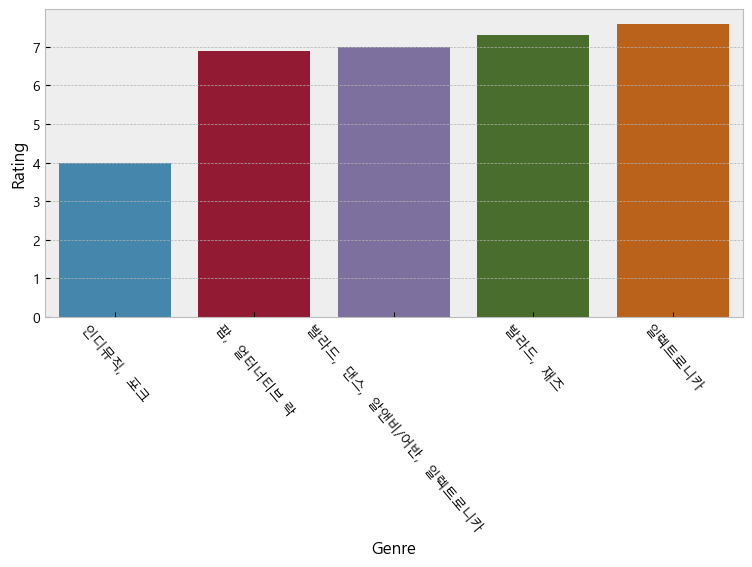

In [44]:
worst_bot5 = sns.barplot(data=tot_Genre.head(10),y='Rating',x='Genre')
plt.xticks(rotation = -50)

- insight => 통합적으로 가장 만족도가 적은 worst 5 추출 <br>['인디뮤직,  포크','팝,  얼터너티브 락','발라드,  댄스,  알앤비/어반,  일렉트로니카','발라드,  재즈','일렉트로니카']


In [45]:
tot_Rating.sort_values(by='Rating',ascending=True)
tot_Rating.reset_index(inplace=True)
tot_Rating

,Artist Name,Rating
0,닐로(Nilo),1.5
1,숀(SHAUN),3.7
2,문문(MoonMoon),4.0
3,문문(MoonMoon),4.0
4,영비(Young B),4.2
...,...,...
243,JBJ,9.7
244,남우현,9.7
245,Sia,9.8
246,David Guetta,9.9


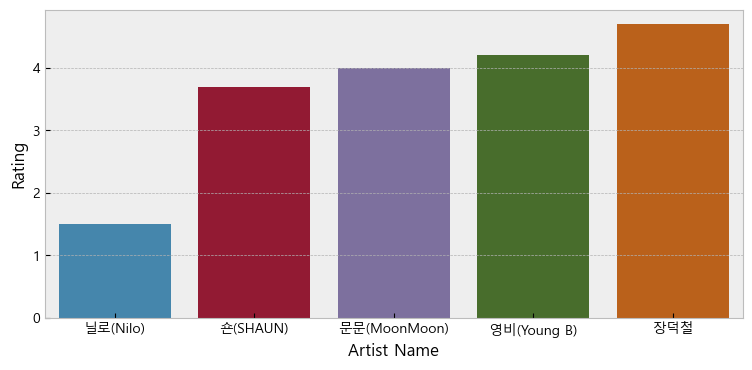

In [46]:
worst_singer = sns.barplot(data=tot_Rating.head(6),y='Rating',x='Artist Name')

- insight => 통합적으로 가장 만족도가 적은 worst 5 추출 <br>['닐로(Nilo)','숀(SHAUN)','문문(MoonMoon)','영비(Young B)','장덕철']

In [33]:
worst = musicData.loc[(musicData['Genre']=='인디뮤직,  포크') &
             (musicData['Genre']=='팝, 얼터너티브 락') |
              (musicData['Genre']=='발라드, 댄스, 알앤비/어반, 일렉트로니카') |
              (musicData['Genre']=='발라드, 재즈') |
              (musicData['Genre']=='일렉트로니카') |
              (musicData['Artist Name']=='닐로(Nilo)') |
              (musicData['Artist Name']=='숀(SHAUN)') |
              (musicData['Artist Name']=='문문(MoonMoon)') |
              (musicData['Artist Name']=='영비(Young B)') |
              (musicData['Artist Name']=='장덕철'), :]
worst

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
2,2017,1,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
128,2017,2,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
220,2017,3,ACT ONE (The Complete Collection),Marian Hill,일렉트로니카,2017.04.12,유니버설뮤직,8.4,24
232,2017,3,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
307,2017,4,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
407,2017,5,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
502,2017,6,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
616,2017,7,아침에,영비(Young B),랩/힙합,2017.06.28,로엔엔터테인먼트,4.2,1
618,2017,7,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
691,2017,8,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5


In [34]:
distibution_worst = worst['Distribution'].value_counts().reset_index()
distibution_worst.columns=['제작사','worst_count']
distibution_worst

,제작사,worst_count
0,로엔엔터테인먼트,11
1,소니뮤직,8
2,퍼플파인엔터테인먼트,7
3,(주)미러볼뮤직,6
4,워너뮤직코리아,4
5,유니버설뮤직,1


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '로엔엔터테인먼트'),
  Text(1, 0, '소니뮤직'),
  Text(2, 0, '퍼플파인엔터테인먼트'),
  Text(3, 0, '(주)미러볼뮤직'),
  Text(4, 0, '워너뮤직코리아'),
  Text(5, 0, '유니버설뮤직')])

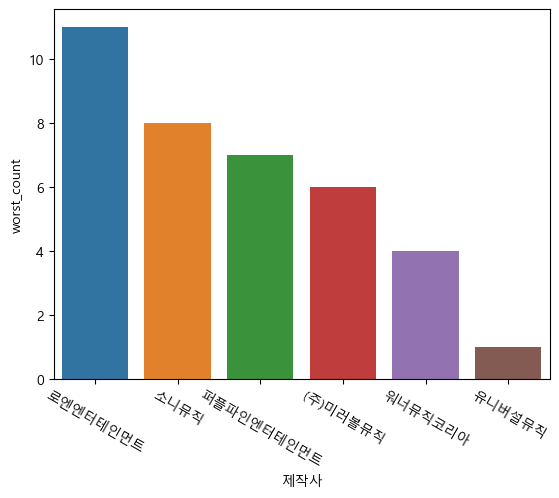

In [35]:
sns.barplot(data=distibution_worst,y='worst_count',x='제작사')
plt.xticks(rotation=-30)

insight => 안좋은 요소를 가지고 있는 값만 보면 로엔에 투자를 하면 안됨

# 3차 분석<br>

- 로엔이 worst 요소를 많이 가지고 있지만 주제는 투자하지 말아야할 회사를 찾는 거기 때문에<br>음원을 낸 숫자 중 worst 요소 비율로 결과를 재 추출

In [36]:
music_count = musicData.groupby('Distribution')['Music Count'].sum()
music_count = music_count.to_frame().reset_index()
df = music_count.loc[(music_count['Distribution']=='로엔엔터테인먼트')| 
                (music_count['Distribution']=='소니뮤직')|
                (music_count['Distribution']=='퍼플파인엔터테인먼트')|
               (music_count['Distribution']=='(주)미러볼뮤직')|
                (music_count['Distribution']=='워너뮤직코리아')|
               (music_count['Distribution']=='유니버설뮤직'),:
               ]
df.columns = ['제작사','음악 수']
df

,제작사,음악 수
2,(주)미러볼뮤직,78
10,로엔엔터테인먼트,3034
11,소니뮤직,347
12,워너뮤직코리아,815
13,유니버설뮤직,712
14,퍼플파인엔터테인먼트,49


In [37]:
result = pd.merge(df, distibution_worst, how = 'inner')

result

,제작사,음악 수,worst_count
0,(주)미러볼뮤직,78,6
1,로엔엔터테인먼트,3034,11
2,소니뮤직,347,8
3,워너뮤직코리아,815,4
4,유니버설뮤직,712,1
5,퍼플파인엔터테인먼트,49,7


In [38]:
result['worst 비율'] = result['worst_count'] / result['음악 수']

In [39]:
result.sort_values(by='worst 비율',ascending=False)

,제작사,음악 수,worst_count,worst 비율
5,퍼플파인엔터테인먼트,49,7,0.142857
0,(주)미러볼뮤직,78,6,0.076923
2,소니뮤직,347,8,0.023055
3,워너뮤직코리아,815,4,0.004908
1,로엔엔터테인먼트,3034,11,0.003626
4,유니버설뮤직,712,1,0.001404


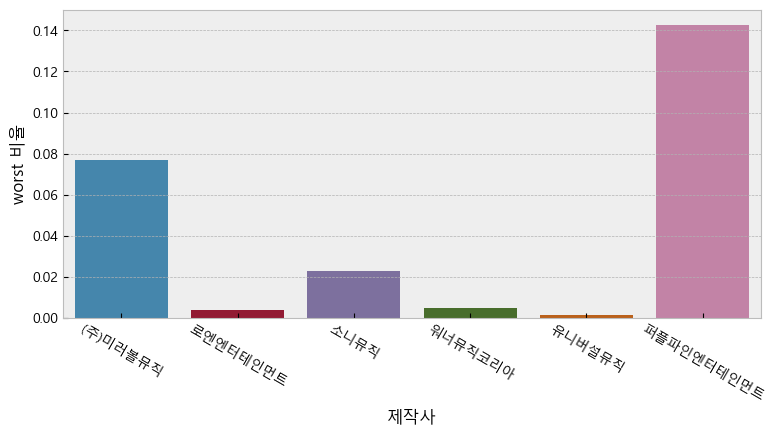

In [40]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (9,4)

sns.barplot(data = result, x = '제작사', y = 'worst 비율')
plt.xticks(rotation = -30)

plt.show()

- insight => 위에 결과에 비해 낸 음악 수에 따라 worst_count를 비율로 잡으면 퍼플파인엔터에 가장 투자를 하면 안됨

### 결론 : 퍼플파인, 미러볼, 소니, 워너뮤직, 로엔, 유니버설 순으로 투자를 하면 안됨
<br>
- 추가<br><br>
- 현재는 아이유가 소속 되어 있는 로엔 엔터라는 곳이 많이 아이유 단독 주행으로 많이 뜨고 있지만 <br>한정된 데이터 속에서 2017 ~ 18년도까지의 데이터 밖에 없기 때문에<br>데이터 상으로는 2017~18년에는 로엔 엔터의 음악의 요소들이 대중적이지 못했던 것 같다.
<br><br>
- 과거부터 현재까지 이어지는 데이터가 아니라면 3~4년 밖에 안 됬어도 과거 데이터만을 신뢰해서는 안된다.